<a href="https://colab.research.google.com/github/shukla891/AI-ML-projects/blob/main/traffic_signal_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linking kaggle to colab and importing kaggle dataset to google colab

In [ ]:
# Run this cell and select the kaggle.json file downloaded from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shukla891","key":"1e14cd32b3a971c8c0149dfc957742b9"}'}

In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle, so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Creating directory and changing the current working directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [ ]:
# Searching for dataset
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34         101832       1074  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          13437        282  1.0              
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                        118MB  2023-07-11 04:21:24            586         30  1.0              
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

In [ ]:
# Downloading dataset and coming out of directory
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

 98% 601M/612M [00:04<00:00, 148MB/s]
100% 612M/612M [00:04<00:00, 129MB/s]
/content


In [ ]:
# Unzipping downloaded file and removing unusable file
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

Importing libraries


In [ ]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

In [ ]:
# Plotting 16 images to check dataset
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i) # 1 row,1 column and ith image
    plt.tight_layout() #automatically adjust subplots...an optional
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [ ]:
rand_img.shape

(53, 51, 3)

In [ ]:
# As size of images are different we have to make them equal so we will take mean of dimanesions
dim1 = []
dim2 = []

for i in range(0,43):  #42 classes we have
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i) # put value of 'i' in curley bracket
    image_path = os.listdir(labels) #os.listdir(path)...returns list of all files and directory in 'labels' path
    for x in image_path:
        img = imread(labels + '/' + x) #imread used to read an image from a file
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [ ]:
print(labels)

traffic_sign_dataset/Train/42


In [ ]:
len(image_path)

240

In [ ]:
len(dim1)

39209

In [ ]:
#Printing mean dimension of images
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


In [ ]:
# Now we will reshape the images to (50,50)
images = []
label_id = []

for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [ ]:
print(images)

In [ ]:
images[0].shape

(50, 50, 3)

In [ ]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images/255

In [ ]:
print(images)

In [ ]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [ ]:
images.shape

(39209, 50, 50, 3)

In [ ]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [ ]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [ ]:
#keras has a built-in function for one-hot encoding.  #to prevent prioritization
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

Building CNN

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

compiling CNN

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

Training CNN

In [ ]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 281s - loss: 2.3917 - accuracy: 0.3409 - val_loss: 1.1612 - val_accuracy: 0.7112 - 281s/epoch - 1s/step
Epoch 2/10
246/246 - 265s - loss: 1.0445 - accuracy: 0.6731 - val_loss: 0.4272 - val_accuracy: 0.9093 - 265s/epoch - 1s/step
Epoch 3/10
246/246 - 278s - loss: 0.6278 - accuracy: 0.7995 - val_loss: 0.2355 - val_accuracy: 0.9578 - 278s/epoch - 1s/step
Epoch 4/10
246/246 - 272s - loss: 0.4837 - accuracy: 0.8449 - val_loss: 0.1573 - val_accuracy: 0.9686 - 272s/epoch - 1s/step
Epoch 5/10
246/246 - 270s - loss: 0.3943 - accuracy: 0.8751 - val_loss: 0.1401 - val_accuracy: 0.9739 - 270s/epoch - 1s/step
Epoch 6/10
246/246 - 270s - loss: 0.3475 - accuracy: 0.8872 - val_loss: 0.1041 - val_accuracy: 0.9818 - 270s/epoch - 1s/step
Epoch 7/10
246/246 - 270s - loss: 0.3019 - accuracy: 0.9024 - val_loss: 0.0868 - val_accuracy: 0.9841 - 270s/epoch - 1s/step
Epoch 8/10
246/246 - 269s - loss: 0.2664 - accuracy: 0.9147 - val_loss: 0.0799 - val_accuracy: 0.9841 - 269s/epoch - 1s/step


<Axes: >

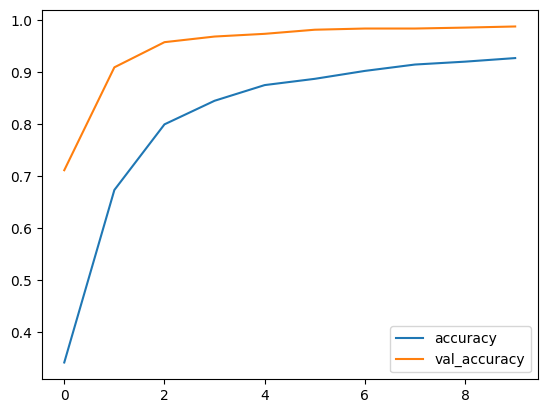

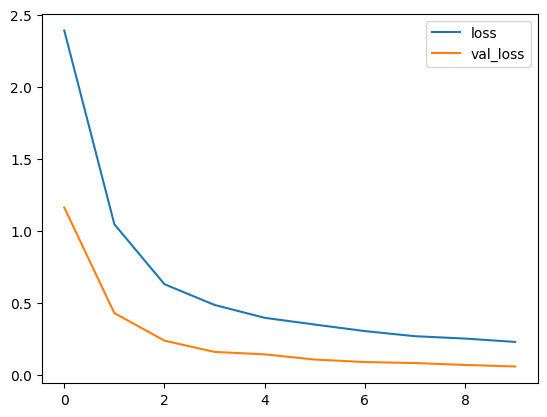

In [ ]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [ ]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

In [ ]:
#defining a function that will scale images for testing data
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images

    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

In [ ]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)
print(test_images)

[[[[0.45098039 0.54117647 0.67843137]
   [0.45490196 0.54117647 0.6745098 ]
   [0.45490196 0.5372549  0.6627451 ]
   ...
   [0.34117647 0.43529412 0.53333333]
   [0.3254902  0.40784314 0.50588235]
   [0.2627451  0.3372549  0.43137255]]

  [[0.4627451  0.56078431 0.69803922]
   [0.45490196 0.54901961 0.69411765]
   [0.45098039 0.54117647 0.68235294]
   ...
   [0.47058824 0.55686275 0.6745098 ]
   [0.47058824 0.54509804 0.65882353]
   [0.4627451  0.5372549  0.65490196]]

  [[0.45490196 0.56078431 0.69411765]
   [0.44313725 0.54509804 0.68235294]
   [0.45490196 0.55294118 0.68235294]
   ...
   [0.4745098  0.55686275 0.68627451]
   [0.47058824 0.54901961 0.67058824]
   [0.4745098  0.54901961 0.67843137]]

  ...

  [[0.45490196 0.53333333 0.65490196]
   [0.45882353 0.53333333 0.65098039]
   [0.45098039 0.5254902  0.6627451 ]
   ...
   [0.45882353 0.53333333 0.64705882]
   [0.45490196 0.54117647 0.64705882]
   [0.44705882 0.54901961 0.65882353]]

  [[0.44705882 0.52941176 0.65490196]
   [0.4

In [ ]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [ ]:
y_pred=np.argmax(model.predict(test_images), axis=-1)
y_pred

395/395 [==============================] - 22s 56ms/step


array([16,  1, 38, ..., 38,  7, 10])

In [ ]:
# Storing all lables
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

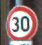

In [ ]:
# Visualize test image
img = Image.open(test_path + '/00001.png')
img

In [ ]:
# Original label
print("Original label : ",all_lables[y_test[1]])

Original label :  Speed limit (30km/h)


In [ ]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[1]])

Predicted label :  Speed limit (30km/h)


In [ ]:
git